# Аналитика в авиакомпании

Перед нами, как перед аналитиком авиакомпании были поставлены две задачи:
1. Проверить гипотезу о том что во время проведения фестивалей увеличивается количество продаваемых авиабилетов в город проведения фестиваля
2. Провести исследовательский анализ сводных данных о количестве выполненных рейсов в разрезе моделей самолетов и о количестве рейсов в разрезе городов

# Задача 1 - Проверка гипотезы

Для решения этой задачи мы написали парсер для сбора данных о крупнейших фестивалях и обнаружили что нам доступны сведения об **11 фестивалях**, из этих 11 фестивалей всего 3 происходили в городе Москве, остальные были распределены по разным городам.

К сожалению такого количества данных недостаточно для проверки гипотез по критериям Стьюдента, проверить выдвинутую гипотезу не представляется возможным.

# Задача 2 - Исследовательский анализ данных

С помощью SQL запросов к базе данных авиакомпании мы получили два набора данных:
1. Количество рейсов для каждой модели самолетов в сентябре 2018 года
2. Среднее количество рейсов, прибывающих в города за день в августе 2018 года

# Содержание
1. [Этап 1 - Загрузка и просмотр данных](#stage_1)
  * [Вывод первого этапа](#stage_1_summary)
        

2. [Этап 2 - Анализ данных](#stage_2)
   
  * [Распределение рейсов по городам](#stage_2_total_town_flights)
  * [ТОП10 городов по количеству прибывающих рейсов](#stage_2_TOP10_town_flights)
  * [Распределение рейсов по моделям самолетов](#stage_2_model_flights)
  * [Вывод второго этапа](#stage_2_summary)
       

3. [Общий вывод](#conclusion)

# Этап 1 - Загрузка и просмотр данных <a id="stage_1"></a>

Подключим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузим наборы данных в датафреймы

`flights_model` - рейсы по моделям самолетов

`flights_city` - рейсы по городам

In [2]:
flights_model = pd.read_csv('/datasets/query_1.csv')
flights_city = pd.read_csv('/datasets/query_3.csv')

Выведем на экран первую таблицу

In [3]:
flights_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Отобразим общую информацию

In [4]:
flights_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Таблица содержит следующую информацию:
* model — модель самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Так как таблица получена в результате выполнения запроса к базе данных она не содержит пропусков, типы данных в порядке и в целом она готова к работе

Вторая таблица

In [5]:
flights_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Общая информация о ней

In [6]:
flights_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Содержимое второй таблицы:

* city — город
* average_flights — среднее количестве рейсов, прибывающих в город city за день в августе 2018 года

Аналогично таблице с моделями самолетов - таблица полученая в результате запроса не содержит пропусков, типы данных в порядке

## Вывод <a id="stage_1_summary"></a>

Просмотр общей информации о таблицах показал что таблицы полученные в результате группировки данных SQL запросами получаются полностью готовыми к работе с ними

# Этап 2 - Анализ данных<a id="stage_2"></a>

### Распределение рейсов по городам<a id="stage_2_total_town_flights"></a>

Выведем на экран общие статистические показатели и построим гистограмму распределения

In [7]:
flights_city['average_flights'].describe().round(2)

count    101.00
mean       5.49
std       13.12
min        1.00
25%        2.00
50%        3.00
75%        5.87
max      129.77
Name: average_flights, dtype: float64

В среднем в каждый город прибывает по 5 рейсов в день, но этот показатель искажен выбросом (129 рейсов в день), скорее всего в один из крупных городов (Москва или Санкт-Петербург), медиана (3 рейса) должна точнее описывать положение, особенно если учесть тот факт что в 75% городов осуществляется 5 или менее рейсов в день

Text(0, 0.5, 'Частота')

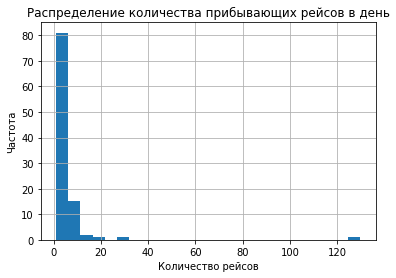

In [8]:
flights_city['average_flights'].plot(kind='hist', bins=25, grid=True)
plt.title('Распределение количества прибывающих рейсов в день')
plt.xlabel('Количество рейсов')
plt.ylabel('Частота')

Гистограмма распределения количества рейсов в день по городам наглядно демонстрирует распределение по перцентилям: 75% укладывается в корзину [1-5], следом идет 24% в корзине [6-10] и выбросы за этими границами

Для наглядности построим диаграмму на которой отобразим все имеющиеся города и среднее количество рейсов в день по каждому из них

Text(0, 0.5, 'Количество рейсов')

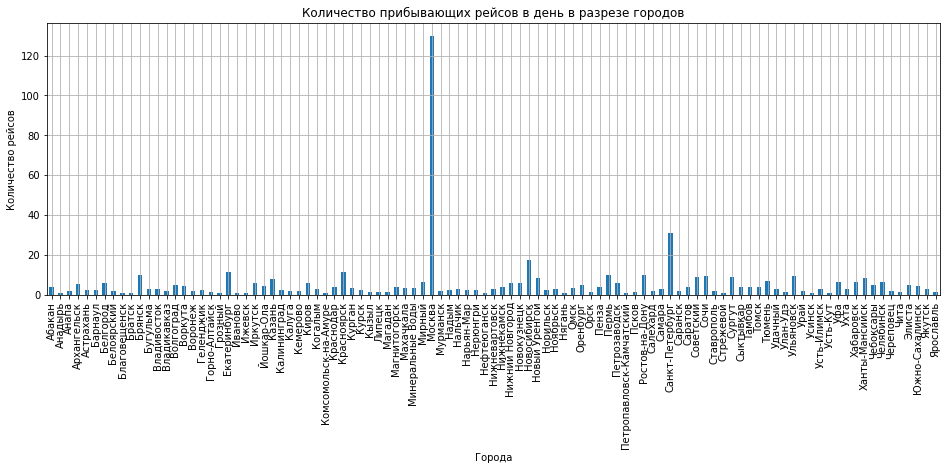

In [9]:
flights_city.plot(kind='bar', x='city', y='average_flights', grid=True, legend=False, figsize=(16,5))

plt.title('Количество прибывающих рейсов в день в разрезе городов')
plt.xlabel('Города')
plt.ylabel('Количество рейсов')

Теперь мы видим что огромный выброс по количеству (129 рейсов в день) это город Москва, по большинству других городов количество редко превышает 5 рейсов в день

### ТОП10 городов по количеству прибывающих рейсов <a id="stage_2_TOP10_town_flights"></a>

Отсортируем таблицу по убыванию количества рейсов и выведем на экран первые 10 строк

In [10]:
flights_city.sort_values('average_flights', ascending=False).round(2).head(10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Москва, ожидаемо, на первом месте, Санкт-Петербург ожидаемо на втором, следом идут города миллионники, замыкают десятку два относительно крупных города Брянск и Ульяновск. И неожиданно в ТОП 10 попал город Советский с населением всего 29 тысяч человек

Отобразим таблицу на графике

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

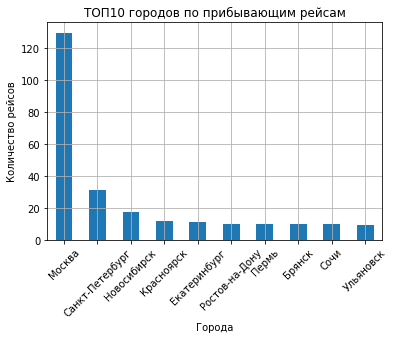

In [11]:
flights_city.sort_values('average_flights', ascending=False).head(10).plot(kind='bar', x='city', y='average_flights', 
                                                                           grid=True, legend=False)

plt.title('ТОП10 городов по прибывающим рейсам')
plt.xlabel('Города')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)

Москва лидирует с большим отрывом, но это не удивительно, в этом городе 4 аэропорта против 3 в Санкт-Петербурге и по одному во всех остальных городах из ТОП10

### Распределение рейсов по моделям самолетов<a id="stage_2_model_flights"></a>

Отсортируем имеющуюся таблицу и выведем ее на экран

In [12]:
flights_model.sort_values('flights_amount', ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [13]:
flights_model.loc[flights_model['model'] == 'Cessna 208 Caravan', 'flights_amount']

6    4557
Name: flights_amount, dtype: int64

Три первых строчки, с открывом более чем в 4 раза от ближайшего конкурента, занимают самолеты региональной, местной авиации, они летают на меньшие расстояния но их они дешевле чем самолеты дальней авиации и парк таких самолетов гораздо больше

Замыкает таблицу Boeing 777-300 - большой, дорогой и, видимо, редкий в нашей стране самолет

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

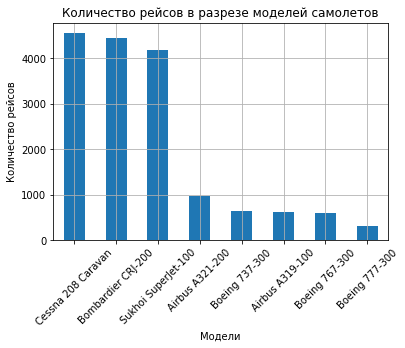

In [14]:
flights_model.sort_values('flights_amount', ascending=False).plot(kind='bar', x='model', y='flights_amount', 
                                                                  grid=True, legend=False)

plt.title('Количество рейсов в разрезе моделей самолетов')
plt.xlabel('Модели')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=45)

Посчитаем сколько рейсов суммарно выполнили самолеты региональной авиации а сколько дальней

In [15]:
far_avia = 0
close_avia = 0
index = 0
for model in flights_model['model']:
    if (model.find('Airbus') >= 0) or (model.find('Boeing') >= 0):
        index = flights_model.loc[flights_model['model'] == model].index[0]
        far_avia = far_avia + flights_model.loc[index, 'flights_amount']
    else:
        index = flights_model.loc[flights_model['model'] == model].index[0]
        close_avia = close_avia + flights_model.loc[index, 'flights_amount']
        
print('Рейсов дальней авиации: ', far_avia)
print('Рейсов региональной авиации: ', close_avia)
print('Отношение: ', round(close_avia / far_avia, 2))

Рейсов дальней авиации:  3097
Рейсов региональной авиации:  13188
Отношение:  4.26


Суммарно рейсов межрегиональной авиации совершено в 4,26 раза больше чем рейсов дальней авиации

## Вывод <a id="stage_2_summary"></a>

Анализ сформированных таблиц показал что медианное количество прибывающих рейсов в день по городам России - 3 рейса в день, причем 75% городов укладывается в 5 рейсов в день

Анализ состава ТОП10 городов показал что Москва, ожидаемо, на первом месте, Санкт-Петербург ожидаемо на втором, следом идут города миллионники и замыкает десятку небольшой северный город Советский с населением всего 29 тысяч человек

Построенный график распределения количества рейсов по моделям показал что по колияеству рейсов местная, региональная ациация более чем в 4 раза превышает по количеству рейсов дальнюю авиацию

# Общий вывод<a id="conclusion"></a>

Перед нами стояло 2 задачи:

1. Проверить гипотезу о том что во время проведения фестивалей увеличивается количество продаваемых авиабилетов в город проведения фестиваля
2. Провести исследовательский анализ сводных данных о количестве выполненных рейсов в разрезе моделей самолетов и о количестве рейсов в разрезе городов

Для решения первой задачи мы написали парсер для собра данных о крупнейших фестивалях, но данных оказалось недостаточно для проверки гипотезы по критериям Стьюдента

Вторую задачу мы решили в два этапа

1. Сначала мы сформировали таблицы с интересующей нас информацию с помощью SQL запросов к базе данных авиакомпании
2. Затем мы провели их анализ средствами python (для работы с данными мы использовали библиотеку pandas)

Анализ сформированных таблиц выявил следующее:

* медианное количество прибывающих рейсов в день по городам России - **3 рейса в день**, причем 75% городов укладывается в **5 рейсов в день**
* по количеству рейсов лидирует город **Москва (129 рейсов в день)** следом идут города Санкт-Петербург (31 рейс) и Новосибирск (17 рейсов)
* самолеты региональной авиации совершили в **4,26 раза** больше чем самолеты дальней авиации